# chap 07

In [35]:
import sklearn.datasets
import torch

X, y = sklearn.datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X, y = torch.from_numpy(X).float(), torch.from_numpy(y).view(-1, 1).float()  # 注意跟model默认的weights保持同类型
model = torch.nn.Linear(1, 1)
criteria = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)  # 记得不是get_parameter()，要设置lr

for epoch in range(200):
    y_pred = model(X)
    loss = criteria(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f'epoch #{epoch:03}: loss={loss:.4f}')

epoch #000: loss=5526.3237
epoch #010: loss=3860.2285
epoch #020: loss=2724.7783
epoch #030: loss=1950.7968
epoch #040: loss=1423.0964
epoch #050: loss=1063.2358
epoch #060: loss=817.7810
epoch #070: loss=650.3268
epoch #080: loss=536.0637
epoch #090: loss=458.0806
epoch #100: loss=404.8484
epoch #110: loss=368.5045
epoch #120: loss=343.6866
epoch #130: loss=326.7366
epoch #140: loss=315.1578
epoch #150: loss=307.2471
epoch #160: loss=301.8415
epoch #170: loss=298.1471
epoch #180: loss=295.6219
epoch #190: loss=293.8955


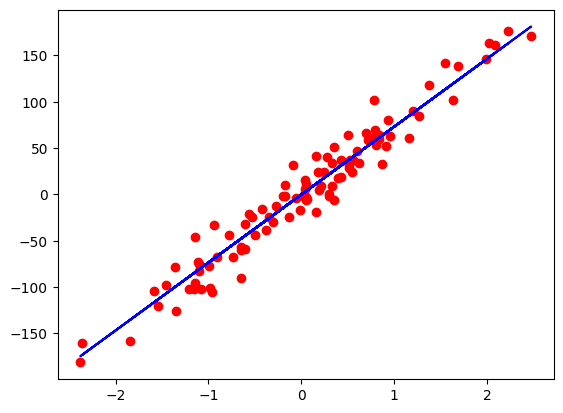

In [36]:
import matplotlib.pyplot as plt

y_pred = model(X).detach()
plt.plot(X.numpy(), y.numpy(), 'ro')
plt.plot(X.numpy(), y_pred.numpy(), 'b')
plt.show()

# chap 08

In [84]:
import sklearn.model_selection

bc = sklearn.datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train, X_test, y_train, y_test = (torch.from_numpy(e).float() for e in (X_train, X_test, y_train, y_test))

In [85]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, dim: int) -> None:
        super().__init__()
        self.linear = torch.nn.Linear(dim, 1, bias=True)

    def forward(self, X):
        return torch.sigmoid(self.linear(X))


model = LogisticRegression(dim=X_train.shape[1])
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)

for epoch in range(200):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)  # 注意这里的顺序
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f'epoch #{epoch:03}: loss={loss:.4f}')

epoch #000: loss=0.4883
epoch #010: loss=0.4118
epoch #020: loss=0.3620
epoch #030: loss=0.3267
epoch #040: loss=0.3002
epoch #050: loss=0.2794
epoch #060: loss=0.2626
epoch #070: loss=0.2486
epoch #080: loss=0.2367
epoch #090: loss=0.2265
epoch #100: loss=0.2176
epoch #110: loss=0.2098
epoch #120: loss=0.2028
epoch #130: loss=0.1965
epoch #140: loss=0.1908
epoch #150: loss=0.1856
epoch #160: loss=0.1808
epoch #170: loss=0.1765
epoch #180: loss=0.1724
epoch #190: loss=0.1687


In [86]:
y_test_pred = model(X_test).detach().numpy()
acc = (y_test_pred.round() == y_test.numpy()).mean()  # 注意 y_test后面要写.numpy()
print(f'accuracy: {acc:.2%}')

accuracy: 92.98%
